In [22]:
from matplotlib import pyplot as plt
import logging
import random
from typing import List, Tuple
%matplotlib inline

Write a code to generate and display a cellular automaton with two changes from the binary CA case:

1) replace the 2-state system with a 3-state system. Thus a cell, instead of being either 0 or 1, can be 0, 1, or 2.

2) define the neighborhood as the cell above and to the left, rather than above, to the left, and to the right. This is so that there are `3^9` = 19683 possible input configurations instead of `3^(3^3)` which is greater than 10^{12}. (By 'neighborhood' here we mean the set of cells that, together with a rule, determine a cell's value. In the 2-state example we did in class, the neighborhood for a given cell was the cell above and its nearest neighbors.)

Do two versions: one without use of functions and classes, and one with use of functions and at least one class. See if you can reuse some of Adam Rupe's 2-state CA code. Upload your solutions as a single Jupyter Notebook.

In [23]:
def number_to_base(n: int, b: int) -> List[int]:
    """
    Source: https://stackoverflow.com/a/28666223
    Converts any number to a list of integers corresponding to different digits.
    For example, 15 in decimal would be returned as [1, 5].
    5 in binary would be returned as [1, 0, 1]
    number_to_base(6, 2) --> [1, 1, 0]
    :param n: Input number
    :param b: Base to convert input number n
    :return: List of digits in order of most to least significant bits
    """
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

In [24]:
def generate_neighborhoods(neighborhood_members: int, num_states: int) -> List[Tuple]:
    """
    Generates a list of tuples corresponding to possible neighborhoods
    :param neighborhood_members: Number of elements in each neighborhood. For example, left, above, and right is neighborhood_members=3.
    :param num_states: Number of possible values for each element in a neighborhood. For example, a binary system with 0 and 1 is num_states=2.
    :return: List of tuples. For example, [(0,0,0), (0,0,1), ...]
    """
    neighborhoods: list[tuple] = []

    # loop until the length of neighborhoods exceed neighborhood_members
    decimal_number = 0
    while True:
        number_list: list[int] = number_to_base(decimal_number, num_states)  # gives list of digits like [1,0,1]
        number_string: str = ''.join([str(i) for i in number_list]).zfill(neighborhood_members)  # should be a string with length=neighborhood_members like 0101
        if len(number_string) > neighborhood_members:
            break
        to_append = tuple((int(char) for char in number_string))
        neighborhoods.append(to_append)
        logging.info(number_list, number_string, to_append)
        decimal_number += 1
    return neighborhoods


In [25]:
def get_max_rule(neighborhood_members: int, num_states: int) -> int:
    """
    Given a neighborhood number and number of possible per states, return max rule number
    :param neighborhood_members: Number of elements in each neighborhood. For example, left, above, and right is neighborhood_members=3.
    :param num_states: Number of possible values for each element in a neighborhood. For example, a binary system with 0 and 1 is num_states=2.
    :return: Integer corresponding to maximum rule number
    """
    # For example, if there's eight possible neighborhoods in a two-state system
    # then the max rule is 1111,1111
    num_of_digits = len(generate_neighborhoods(neighborhood_members, num_states))
    max_state = str(num_states - 1)  # for example, 1 in a two-state system
    max_rule = int(max_state*num_of_digits, num_states)
    return max_rule

In [26]:
def get_starting_state(length: int, base: int) -> List[int]:
    """
    Returns a list of random integers of specified length and base
    :param length: Length of string
    :param base: Base of numbers in strings. For example, base=2 would return a string with only 0 and 1
    :return: String of
    """
    if not isinstance(length, int) or length <= 0:
        raise ValueError("input length must be a positive integer")
    return [random.randint(0,base-1) for _ in range(length)]

In [27]:
def generate_converted_rule(rule, neighborhood_members, num_states) -> List[int]:
    """Convert rule number to binary, ternary, etc, rule number"""
    # example: if rule=11 --> converted_rule=[1, 0, 1, 1]
    converted_rule_list: list[int] = number_to_base(rule, num_states)
    # [1, 0, 1, 1] --> [1, 1, 0, 1]
    converted_rule_list = converted_rule_list[::-1]

    # if max_rule=255 = [1, 1, 1, 1, 1, 1, 1, 1], num_digits=8
    num_digits = len(generate_neighborhoods(neighborhood_members, num_states))

    # pad end with zeroes
    # if rule=11, converted_rule_list=[1,1,0,1] --> [1,1,0,1,0,0,0,0]
    zeroes_to_add = [0] * (num_digits - len(converted_rule_list))
    converted_rule_list = converted_rule_list + zeroes_to_add
    assert len(converted_rule_list) == num_digits

    return converted_rule_list

In [28]:
def propagate_spacetime_field(rows: list[list[int]],
                              lookup_table: dict[tuple[int]: int]) -> list[list[int]]:
    """
    Propagates a spacetime field array from an initial array of rows.
    :param rows: An array of rows, probably all set to zeroes
    :param lookup_table: Dictionary linking neighborhoods to propagation rules
    :return: [list[list[int]]: Propagated rows variable
    """
    length = len(rows[0])
    for row_number, row in enumerate(rows):
        current_row = row.copy()
        new_row = [0]*length
        for column, _ in enumerate(row):
            neighborhood = (current_row[column-1], current_row[column])
            new_row[column] = lookup_table[neighborhood]
        try:
            rows[row_number+1] = new_row
        except IndexError:
            break  # stop propagating
    return rows

# Version with just all one main function
(Technically I use some functions inside this one, but I've been coding too long to use really only one function, that would be a nightmare. I made sure not to use any classes. Since I made my code general for any kind of spacetime diagram, that would be a crazy long function)

Initial conditions: rule=1500, length=10, time=10
neighborhood_members=2, num_states=3
initial_condition=[1, 1, 0, 1, 1, 1, 0, 2, 2, 0]
neighborhoods=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
converted_rule=[0, 2, 1, 1, 0, 0, 2, 0, 0]
lookup_table={(0, 0): 0, (0, 1): 2, (0, 2): 1, (1, 0): 1, (1, 1): 0, (1, 2): 0, (2, 0): 2, (2, 1): 0, (2, 2): 0}


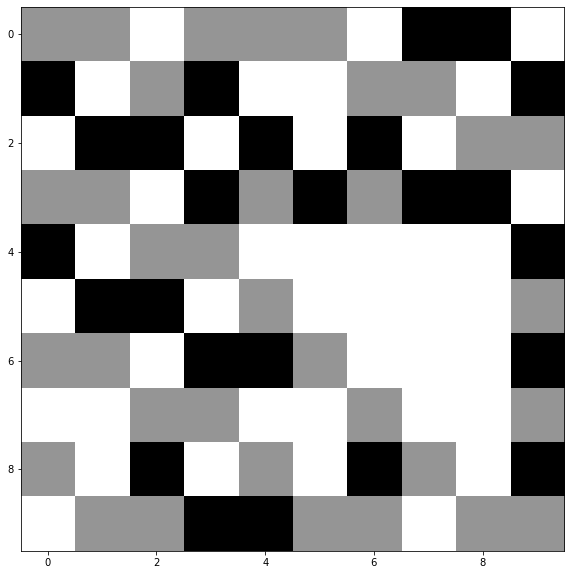

In [29]:
def main(rule: int,
         length: int,
         time: int,
         neighborhood_members: int,
         num_states: int):
    max_rule = get_max_rule(neighborhood_members, num_states)
    if not (0 <= rule <= max_rule):
        raise ValueError(f"Please choose a value for rule between 0 and {max_rule}")
    if length < 0:
        raise ValueError("Please choose a value for length greater than 0")
    if time < 0:
        raise ValueError("Please choose a value for time greater than 0")

    # make the initial condition
    initial_condition: list[int] = []
    for i in range(length):
        initial_condition.append(random.randrange(0, num_states, 1))


    # gives list of tuples like [(0,0,0), (0,0,1), ...]
    neighborhoods: list[tuple[int]] = generate_neighborhoods(neighborhood_members,
                                                        num_states)

    # a list of the rule converted into base-num_states
    converted_rule: list[int] = generate_converted_rule(rule, neighborhood_members, num_states)

    # a dictionary matching a neighborhood to a propagation rule
    lookup_table = dict(zip(neighborhoods, converted_rule))

    print(f"Initial conditions: {rule=}, {length=}, {time=}\n"
          f"{neighborhood_members=}, {num_states=}")
    print(f"{initial_condition=}")
    print(f"{neighborhoods=}")
    print(f"{converted_rule=}")
    print(f"{lookup_table=}")

    # ######### Start propagation of numbers #########

    rows: list[list[int]] = [[0]*length]*time  # initiate array of size length x time
    rows[0] = initial_condition
    rows = propagate_spacetime_field(rows, lookup_table)

    # plot the spacetime field diagram
    plt.figure(figsize=(length, time))
    plt.imshow(rows, cmap=plt.cm.Greys, interpolation='nearest')
    plt.show()

main(1500, 10, 10, 2, 3)

# Version using classes

Initial conditions: rule=2000, length=20, time=20
neighborhood_members=2, num_states=3
self.initial_condition=[1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2]
neighborhoods=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
converted_rule=[2, 0, 0, 2, 0, 2, 2, 0, 0]
lookup_table={(0, 0): 2, (0, 1): 0, (0, 2): 0, (1, 0): 2, (1, 1): 0, (1, 2): 2, (2, 0): 2, (2, 1): 0, (2, 2): 0}


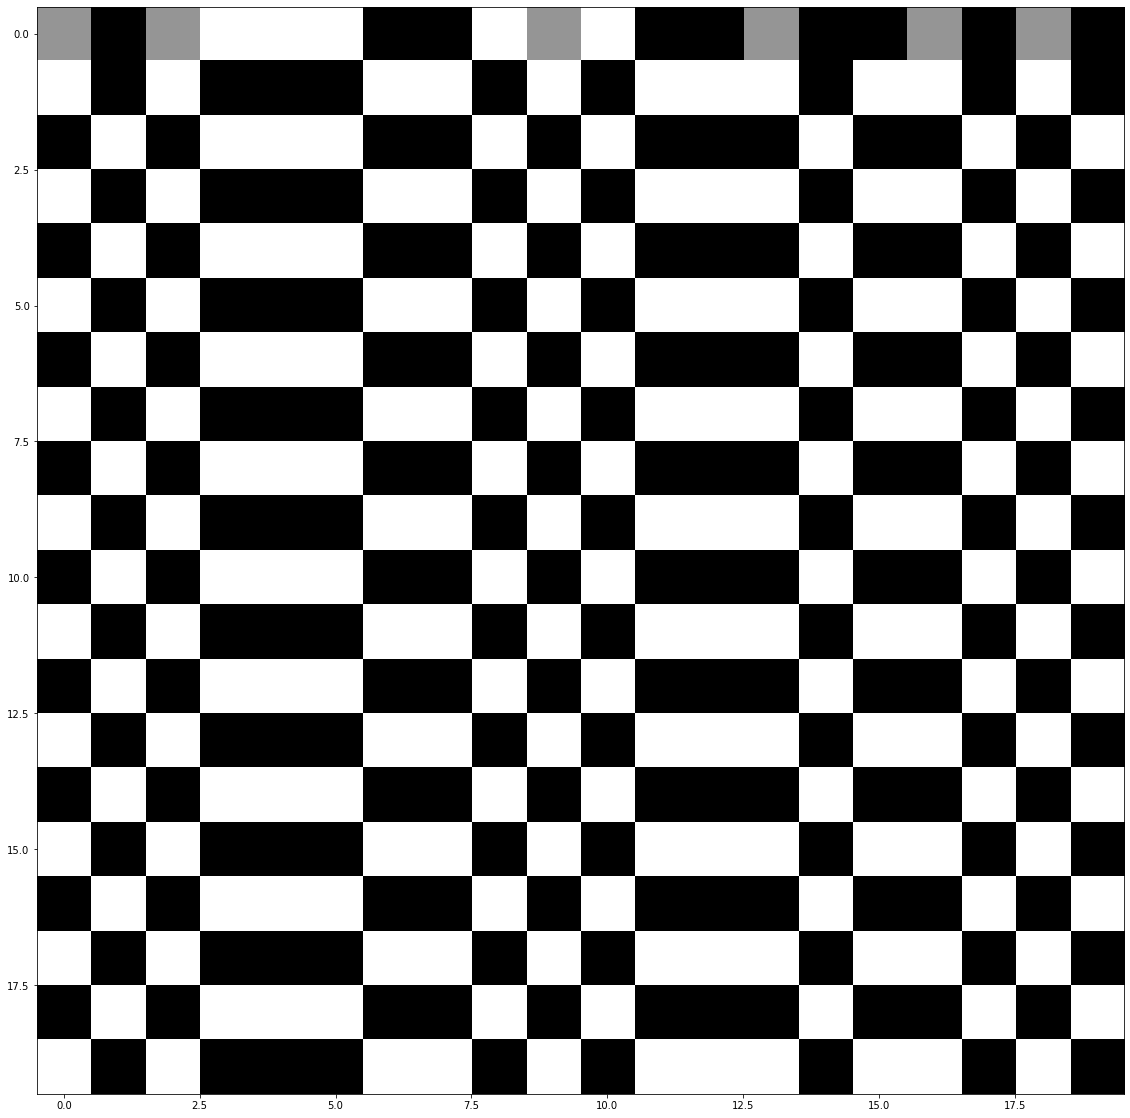

Initial conditions: rule=12345, length=20, time=20
neighborhood_members=2, num_states=3
self.initial_condition=[1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0]
neighborhoods=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
converted_rule=[0, 2, 0, 1, 2, 2, 1, 2, 1]
lookup_table={(0, 0): 0, (0, 1): 2, (0, 2): 0, (1, 0): 1, (1, 1): 2, (1, 2): 2, (2, 0): 1, (2, 1): 2, (2, 2): 1}


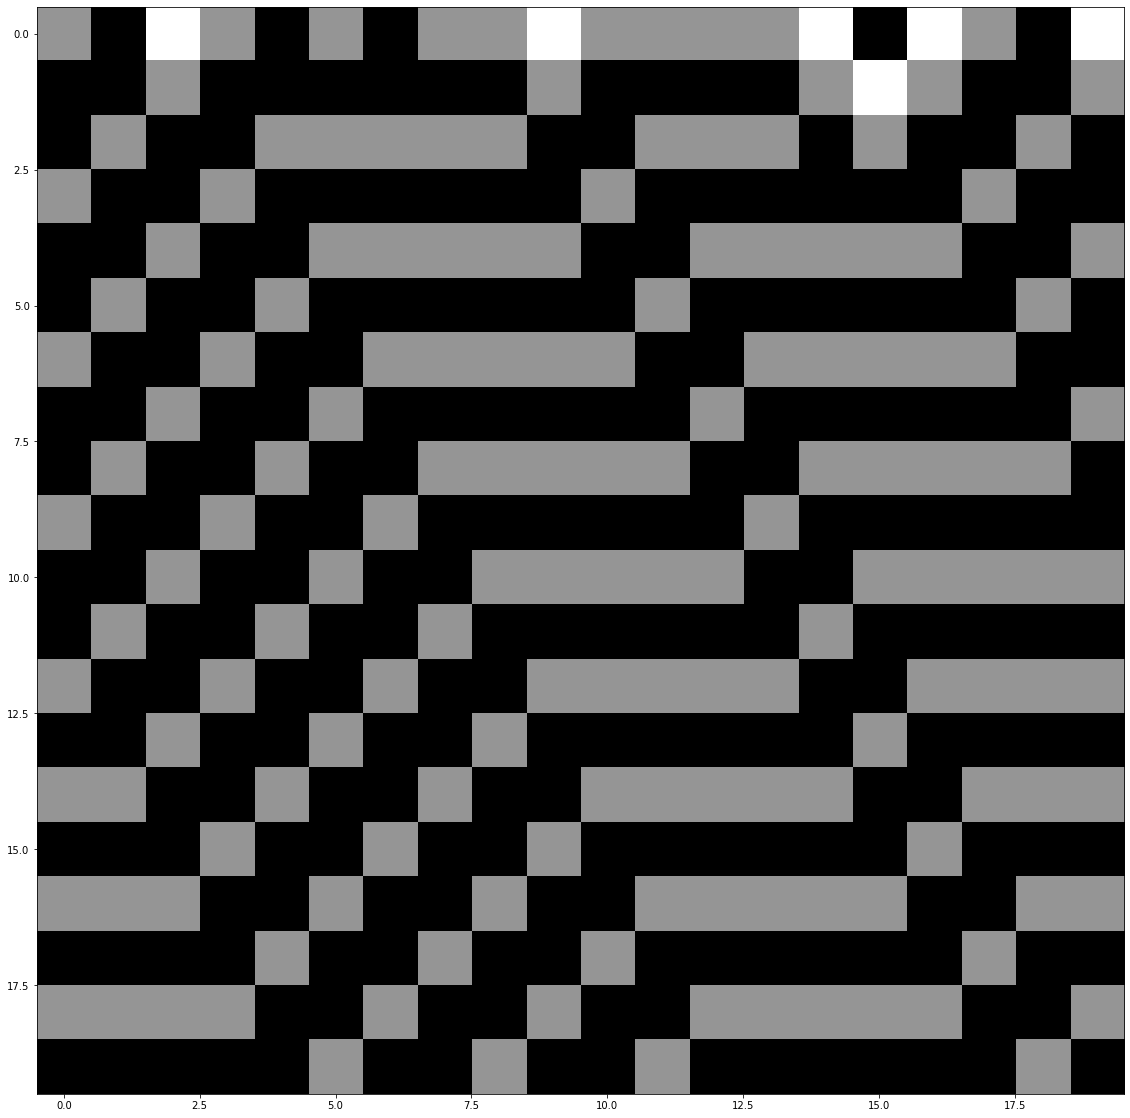

Initial conditions: rule=123456783234123456712312, length=20, time=20
neighborhood_members=2, num_states=8
self.initial_condition=[2, 6, 3, 6, 3, 0, 0, 0, 0, 6, 0, 0, 7, 3, 0, 3, 2, 6, 5, 7]
neighborhoods=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
converted_rule=[0, 7, 1, 7, 0, 4, 6, 4, 1, 7, 4, 6, 5, 2, 2, 4, 2, 1, 4, 5, 1, 1, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lookup_table={(0, 0): 0, (0, 1): 7, (0, 2): 1, (0, 3): 7, (0, 4): 0, (0, 5

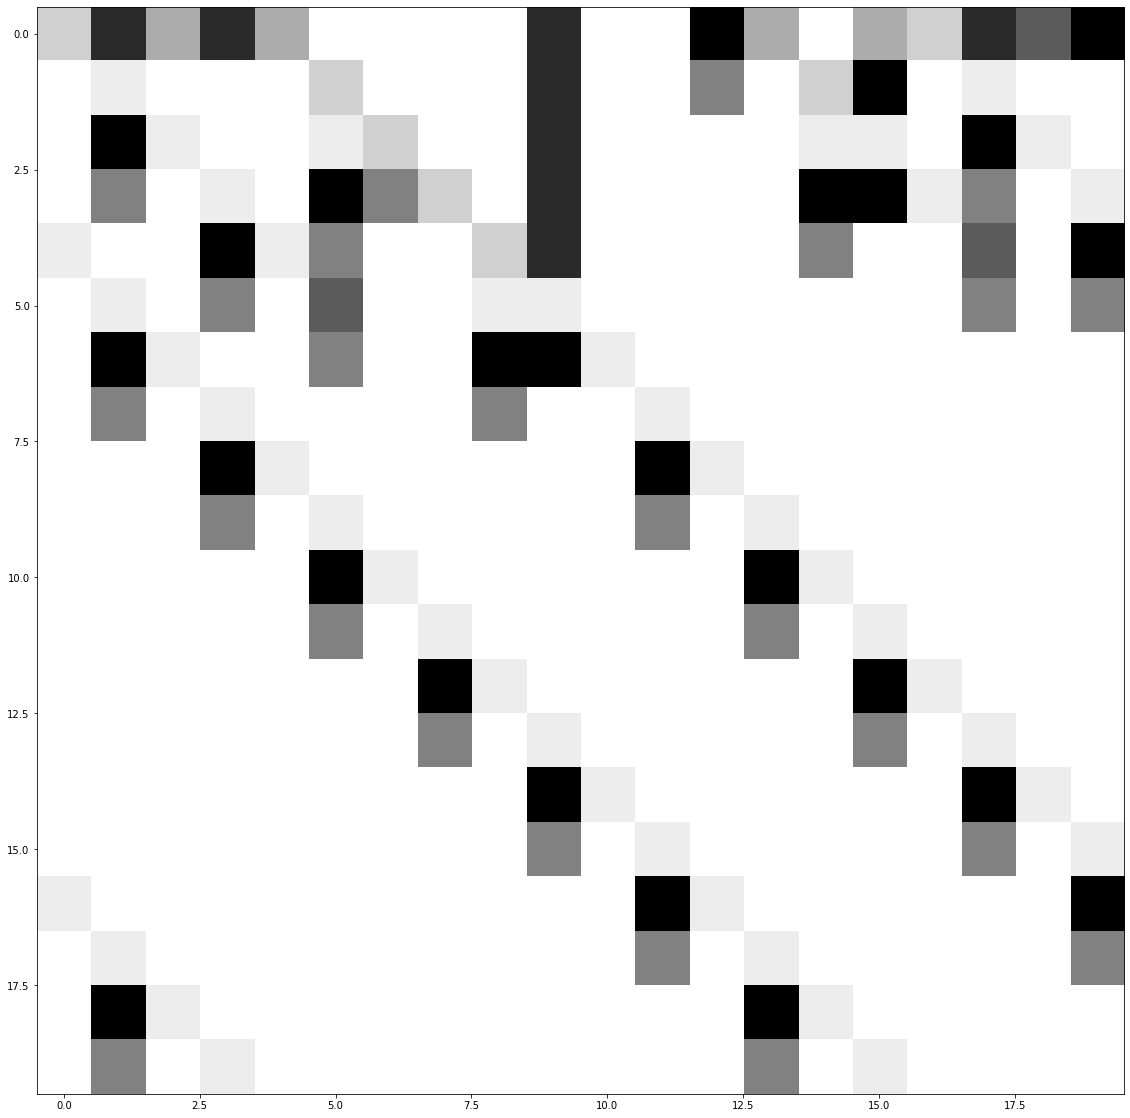

In [41]:
class ECA(object):
    def __init__(self,
                 rule: int,
                 length: int,
                 time: int,
                 neighborhood_members: int,
                 num_states: int):
        """
        A class that creates and propagates a spacetime diagram of size length x time based on a rule
        :param rule: Should be an integer
        :param length:
        :param time:
        :param neighborhood_members:
        :param num_states:
        """
        max_rule = get_max_rule(neighborhood_members, num_states)
        if not (0 <= rule <= max_rule):
            raise ValueError(f"Please choose a value for rule between 0 and {max_rule}")
        if length < 0:
            raise ValueError("Please choose a value for length greater than 0")
        if time < 0:
            raise ValueError("Please choose a value for time greater than 0")

        self.length = length
        self.time = time

        # make the initial condition
        self.initial_condition: list[int] = [0]*length
        for i in range(length):
            self.initial_condition[i] = random.randrange(0, num_states, 1)


        # gives list of tuples like [(0,0,0), (0,0,1), ...]
        neighborhoods: list[tuple[int]] = generate_neighborhoods(neighborhood_members,num_states)

        # a list of the rule converted into base-num_states
        converted_rule: list[int] = generate_converted_rule(rule, neighborhood_members, num_states)

        # a dictionary matching a neighborhood to a propagation rule
        lookup_table = dict(zip(neighborhoods, converted_rule))


        print(f"Initial conditions: {rule=}, {length=}, {time=}\n"
              f"{neighborhood_members=}, {num_states=}")
        print(f"{self.initial_condition=}")
        print(f"{neighborhoods=}")
        print(f"{converted_rule=}")
        print(f"{lookup_table=}")

        # ######### Start propagation of numbers #########

        self.rows = [[0]*length]*time  # initiate array of size length x time
        self.rows[0] = self.initial_condition
        self.rows = propagate_spacetime_field(self.rows, lookup_table)

    def show(self, cmap=plt.cm.Greys, interpolation='nearest'):
        """
        Shows the spacetime diagram
        :return:
        """
        plt.figure(figsize=(self.length, self.time))
        plt.imshow(self.rows, cmap=cmap, interpolation=interpolation)
        plt.show()

ECA(2000, 20, 20, 2, 3).show()
ECA(12345, 20, 20, 2, 3).show()
ECA(123456783234123456712312, 20, 20, 2, 8).show()

#
#
# **Tests**

In [31]:
def number_to_base_tests():
    assert number_to_base(15, 10) == [1, 5]
    assert number_to_base(5, 2) == [1, 0, 1]
    assert number_to_base(27, 6) == [4, 3]
    assert number_to_base(27, 3) == [1, 0, 0, 0]
    print("number_to_base_tests passed")

In [32]:
number_to_base_tests()

number_to_base_tests passed


In [33]:
def generate_neighborhoods_tests():
    assert type(generate_neighborhoods(3, 2)) == list, "function generate_neighborhood() is not returning lists"
    try:
        assert type(generate_neighborhoods(3, 2)[0]) == tuple, "the elements of function generate_neighborhood() are not all tuples"
    except IndexError:
        raise IndexError("The list returned from function generate_neighborhoods() is empty")
    assert generate_neighborhoods(3, 2) == [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)], "The tuples generated by function generate_neighborhoods(3, 2) is not correct"
    assert generate_neighborhoods(4, 2) == [(0,0,0,0), (0,0,0,1), (0,0,1,0), (0,0,1,1), (0,1,0,0), (0,1,0,1), (0,1,1,0), (0,1,1,1), (1,0,0,0), (1,0,0,1), (1,0,1,0), (1,0,1,1), (1,1,0,0), (1,1,0,1), (1,1,1,0), (1,1,1,1)], "The tuples generated by function generate_neighborhoods(4, 2) is not correct"
    assert generate_neighborhoods(2, 3) == [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)], "The tuples generated by function generate_neighborhoods(2, 3) is not correct"
    print("generate_neighborhoods_tests passed")

In [34]:
generate_neighborhoods_tests()

generate_neighborhoods_tests passed


In [35]:
def get_max_rule_tests():
    assert get_max_rule(3, 2) == 255
    assert get_max_rule(4, 2) == 65535
    assert get_max_rule(2, 3) == 19682
    print("get_max_rule_tests passed")

In [36]:
get_max_rule_tests()

get_max_rule_tests passed


In [37]:
def get_starting_state_tests():
    result = get_starting_state(20, 2)
    assert type(result) == list
    assert len(result) == 20
    assert max(result) in [0, 1]
    result = get_starting_state(20, 5)
    assert max(result) in [0, 1, 2, 3, 4]
    print("get_starting_state_tests passed")

In [38]:
get_starting_state_tests()

get_starting_state_tests passed


In [39]:
def generate_converted_rule_tests():
    assert generate_converted_rule(0, 3, 2) == [0,0,0,0,0,0,0,0]
    assert generate_converted_rule(25, 3, 2) == [1,0,0,1,1,0,0,0], generate_converted_rule(25, 3, 2)
    assert generate_converted_rule(250, 3, 2) == [0,1,0,1,1,1,1,1]
    assert generate_converted_rule(50, 2, 3) == [2,1,2,1,0,0,0,0,0],generate_converted_rule(50, 2, 3)
    assert generate_converted_rule(19000, 2, 3) == [1,0,2,1,0,0,2,2,2]
    print("generate_converted_rule_tests passed")

In [40]:
generate_converted_rule_tests()

generate_converted_rule_tests passed
